<a href="https://colab.research.google.com/github/phuri7987/229352-StatisticalLearning-Lab/blob/main/Lab05_decision_tree_bagging_RF_640510703.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [3]:
import pandas as pd
import graphviz

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# import data
data = pd.read_csv("heart_disease.csv", na_values="?")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [4]:

# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [5]:
params = {'max_depth': [3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [6]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=3)

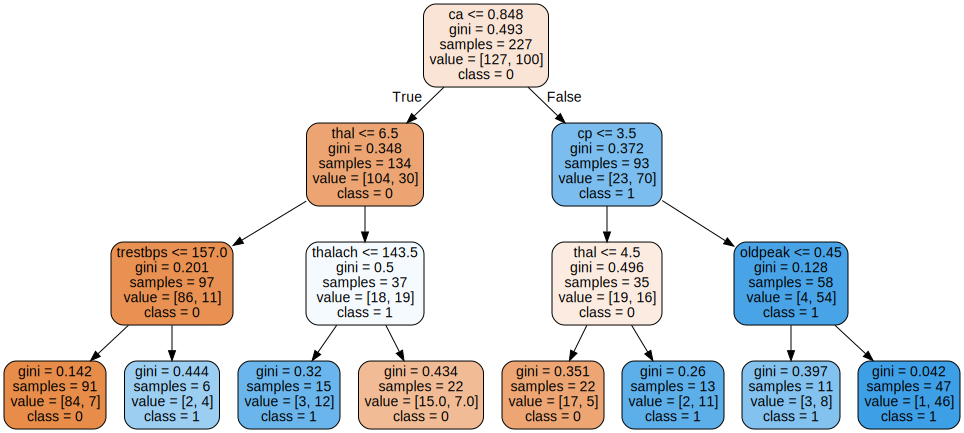

In [7]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

## Bagged decision trees
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [8]:
clf = DecisionTreeClassifier()

## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

In [9]:
rf_clf = RandomForestClassifier()

#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt

# ==== เตรียมข้อมูล ====
y = data["label"]
X = data.drop("label", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# ==== ฟังก์ชันช่วยทำ Grid Search ====
def run_grid_search(model, param_grid):
    pipe = Pipeline([
        ('imputer', SimpleImputer(strategy="mean")),
        ('clf', model)
    ])
    grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)
    return grid

# ==== 1. Decision Tree ====
dt_params = {
    'clf__max_depth': [3, 6, 9, None],
    'clf__criterion': ['gini', 'entropy', 'log_loss'],
    'clf__min_samples_split': [2, 5, 10]
}
dt_grid = run_grid_search(DecisionTreeClassifier(random_state=42), dt_params)

# ==== 2. Bagged Decision Trees ====
bag_params = {
    'clf__n_estimators': [10, 50, 100],
    'clf__max_samples': [0.5, 0.7, 1.0],
    'clf__max_features': [0.5, 0.7, 1.0]
}
bag_grid = run_grid_search(BaggingClassifier(DecisionTreeClassifier(random_state=42), random_state=42), bag_params)

# ==== 3. Random Forest ====
rf_params = {
    'clf__n_estimators': [50, 100, 200],
    'clf__max_depth': [3, 6, None],
    'clf__criterion': ['gini', 'entropy', 'log_loss']
}
rf_grid = run_grid_search(RandomForestClassifier(random_state=42), rf_params)

# ==== สรุปผลแต่ละโมเดล ====
models = {
    "Decision Tree": dt_grid,
    "Bagged Decision Trees": bag_grid,
    "Random Forest": rf_grid
}

results = []
for name, grid in models.items():
    best_model = grid.best_estimator_
    ypred = best_model.predict(X_test)
    acc = accuracy_score(y_test, ypred)
    f1 = f1_score(y_test, ypred, average='macro')
    results.append((name, acc, f1, grid.best_params_))
    print(f"\n{name}")
    print("Best params:", grid.best_params_)
    print("Accuracy:", acc)
    print("F1 macro:", f1)
    print(classification_report(y_test, ypred))

# ==== หาโมเดลที่ดีที่สุด ====
best_model_info = max(results, key=lambda x: x[2])  # เลือกจาก f1_macro
print("\nBest Model:", best_model_info[0])

# ==== ถ้า Best Model เป็น Decision Tree ให้ plot ====
if best_model_info[0] == "Decision Tree":
    best_dt = dt_grid.best_estimator_.named_steps['clf']
    plt.figure(figsize=(12, 8))
    plot_tree(best_dt, filled=True, feature_names=X.columns, class_names=True)
    plt.show()



Decision Tree
Best params: {'clf__criterion': 'entropy', 'clf__max_depth': 3, 'clf__min_samples_split': 2}
Accuracy: 0.7894736842105263
F1 macro: 0.7894736842105263
              precision    recall  f1-score   support

           0       0.81      0.77      0.79        39
           1       0.77      0.81      0.79        37

    accuracy                           0.79        76
   macro avg       0.79      0.79      0.79        76
weighted avg       0.79      0.79      0.79        76


Bagged Decision Trees
Best params: {'clf__max_features': 0.7, 'clf__max_samples': 0.5, 'clf__n_estimators': 10}
Accuracy: 0.868421052631579
F1 macro: 0.8680555555555556
              precision    recall  f1-score   support

           0       0.85      0.90      0.88        39
           1       0.89      0.84      0.86        37

    accuracy                           0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76


Random Fo